<a href="https://colab.research.google.com/github/stat10/DS10-Case-Studies/blob/master/Mexico-Deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import os
register_matplotlib_converters()

# Mexico for Spring Break or Death
---

## Mexico for spring break is dangerous?
![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/test.png)

![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/news_clips_group.png)

## What parties have a stake in the outcome?

- the public
- travel agents
- mexico tourism board
- airlines
- US government
- US embassies
- Schools

![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/Screen-Shot-1.png)

## What data do we need to know if this is true?

## In class Exercise: Find a Data Source for this Online (2 min)

In 2003, the Foreign Relations Authorization Act mandated that, "to the maximum extent practicable, the US Department of State collect and make available on the Department's Bureau of Consular Affairs Internet [website](https://travel.state.gov/content/travel/en/international-travel/while-abroad/death-abroad1/death-statistics.html) certain information with respect to each United States citizen who dies in a foreign country from a non-natural cause. The information required is: 

1. the date of death; 

2. the locality where the death occurred; and 

3. the cause of death, including, if the death resulted from an act of terrorism, a statement disclosing that fact.

![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/Screen2Shot-2.png)

We would select which country and time frame we are interested in viewing and select "download". This then saves the files. We have uploaded all of the data onto a website called "Github" to make it easy for you to run code on the data here.

## Load the data for deaths in Mexico from 2002 to 2018 into this Notebook

Read in the data and save it as a dataframe, we can take a look at the first few rows of information.

You will notice that the data file has the three pieces of required informationn:


Date, City, and Cause of Death
 
We can also look at all the types of Cause of Death (remember these are "unnatural deaths")

In [14]:
if not os.path.exists('Data/deaths_mexico_2002_2019.csv'):
    !wget 'https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Data/deaths_mexico_2002_2019.csv'
    df_mexico = pd.read_csv('deaths_mexico_2002_2019.csv', encoding='latin-1')
else:
    df_mexico = pd.read_csv('Data/deaths_mexico_2002_2019.csv', encoding='latin-1')
df_mexico.head()

,Date,City,Cause of Death
0,10/2/02,Guadalajara - Jalisco - Mexico,Veh. Accident-Auto
1,10/2/02,Tijuana - Baja California Norte - Mexico,Homicide
2,10/3/02,Hermosillo - Sonora - Mexico,Veh. Accident-Auto
3,10/6/02,Veracruz - Veracruz - Mexico,Suicide
4,10/8/02,Puerto Vallarta - Jalisco - Mexico,Veh. Accident-Motorcycle


## Load the data for all deaths abroad from 2002 to 2018 into this Notebook

In [15]:
if not os.path.exists('Data/deaths_all_2002_2019.csv'):
    !wget 'https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Data/deaths_all_2002_2019.csv'
    df_all = pd.read_csv('deaths_all_2002_2019.csv', encoding='latin-1')
else:
    df_all = pd.read_csv('Data/deaths_all_2002_2019.csv', encoding='latin-1')
df_all.head()

,Date,City,Cause of Death
0,10/25/03,Shkin - Afghanistan,Terrorist Action
1,10/25/03,Shkin - Afghanistan,Terrorist Action
2,8/29/04,Kabul - Afghanistan,Terrorist Action
3,8/29/04,Kabul - Afghanistan,Terrorist Action
4,8/29/04,Kabul - Afghanistan,Terrorist Action


## Look at types of Causes of Death

In [33]:
cause_of_deaths = df_all['Cause of Death'].unique()
cause_of_deaths.sort()
print('Number of different causes of death =', len(cause_of_deaths))
print('')
print(cause_of_deaths)

Number of different causes of death = 117

['Air Accident' 'Armed Conflict' 'DROWNING' 'DROWNING-BEACH'
 'DROWNING-Ocean' 'DROWNING-SEA' 'Disaster' 'Drowning' 'Drowning - Beach'
 'Drowning - BeachåÂ\x89ÛÊ' 'Drowning - Ocean' 'Drowning - OceanåÂ\x89ÛÊ'
 'Drowning - Pool' 'Drowning - PoolåÂ\x89ÛÊ' 'Drowning - River'
 'Drowning -Ocean' 'Drowning- BEACH' 'Drowning- LAKE' 'Drowning- Ocean'
 'Drowning-BEACH' 'Drowning-Bay' 'Drowning-Beach' 'Drowning-Bridge'
 'Drowning-CANAL' 'Drowning-LAKE' 'Drowning-Lake' 'Drowning-OCEAN'
 'Drowning-Ocean' 'Drowning-POOL' 'Drowning-Pool' 'Drowning-RIVER'
 'Drowning-River' 'Drowning-beach' 'DrowningåÂ\x89ÛÊ' 'Drug-Related'
 'Drug-related' 'Execution' 'Homicide' 'Homocide' 'Hostage-related'
 'Hostage-related ' 'Maritime Accident' 'Natural Disaster' 'Other'
 'Other Accid.-Fall' 'Other Accident' 'Other Accident - Fall'
 'Other Accident - Mountain Climbing' 'Other Accident - Rafting'
 'Other Accident - fall' 'Other Accident-' 'Other Accident- Hiking'
 'Other Acc

## What are the potential issues with the data?

### Let's look at how many deaths there were in Mexico in 2018 versus how many deaths in total.

Number of deaths in Mexico in 2018 = 196

Number of deaths in total abroad in 2018 = 724

In [38]:
## Code to find number of deaths in Mexico in 2018

## make the date column recognzied as a date for mexico
df_mexico['Date'] = pd.to_datetime(df_mexico['Date'])
start_date = '2018-01-01'
end_date = '2018-12-31'
mask = (df_mexico['Date'] >= start_date) & (df_mexico['Date'] <= end_date)
df_mexico_2018 = df_mexico.loc[mask]
deaths_mexico_2018 = len(df_mexico_2018.index)
print('Number of deaths in Mexico in 2018 =', deaths_mexico_2018)

Number of deaths in Mexico in 2018 = 196


In [39]:
## Code to find number of deaths in total abroad in 2018

## make the date column recognzied as a date for mexico
df_all['Date'] = pd.to_datetime(df_all['Date'])
start_date = '2018-01-01'
end_date = '2018-12-31'
mask = (df_all['Date'] >= start_date) & (df_all['Date'] <= end_date)
df_all_2018 = df_all.loc[mask]
deaths_all_2018 = len(df_all_2018.index)
print('Number of deaths in total abroad in 2018 =', deaths_all_2018)

Number of deaths in total abroad in 2018 = 724


![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview.jpg)

## What do we need to look at in order to understand if this is true?

### We can see some serious issue with the data when we try to do that

In [ ]:
cause_of_deaths_2018 = df_mexico_2018['Cause of Death'].unique()
cause_of_deaths_2018.sort()
print(cause_of_deaths_2018)
## This result is different from the one in R notebook
## Is the data set the same? Or has those issues been fixed in the new dataset?

### Number of homicides in 2018

Number of homicides in Mexico in 2018 = 67

Number of homicides in total abroad in 2018 = 132

In [41]:
## Code to find number of homicides in Mexico in 2018

hom_mexico_2018 = (df_mexico_2018['Cause of Death'].values == 'Homicide').sum()
print('Number of homicides in Mexico in 2018 =', hom_mexico_2018)

Number of homicides in Mexico in 2018 = 67


In [42]:
## Code to find number of homicides in total abroad in 2018

hom_all_2018 = (df_all_2018['Cause of Death'].values == 'Homicide').sum()
print('Number of homicides in total abroad in 2018 =', hom_all_2018)

Number of homicides in total abroad in 2018 = 132


![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview2.jpg)

![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview3.jpg)

### Load Italy deaths data

In [18]:
if not os.path.exists('Data/deaths_italy_2002_2019.csv'):
    !wget 'https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Data/deaths_italy_2002_2019.csv'
    df_italy = pd.read_csv('deaths_italy_2002_2019.csv', encoding='latin-1')
else:
    df_italy = pd.read_csv('Data/deaths_italy_2002_2019.csv', encoding='latin-1')
df_italy.head()

,Date,City,Cause of Death
0,11/4/02,'strada Provinciale 99' - Km. 1.3 - Tortona ...,Veh. Accident-Auto
1,11/13/02,Venice - Italy,Other Accident
2,11/30/02,Perugia - Italy,Suicide
3,1/4/03,Italy,Other Accident
4,5/7/03,Reggio Calabria - Italy,Suicide


### Find number of deaths and homicies Italy in 2018

In [44]:
df_italy['Date'] = pd.to_datetime(df_italy['Date'])
start_date = '2018-01-01'
end_date = '2018-12-31'
mask = (df_italy['Date'] >= start_date) & (df_italy['Date'] <= end_date)
df_italy_2018 = df_italy.loc[mask]
deaths_italy_2018 = len(df_italy_2018.index)
print('Number of deaths in Italy in 2018 =', deaths_italy_2018)
hom_italy_2018 = (df_italy_2018['Cause of Death'].values == 'Homicide').sum()
print('Number of homicides in Italy in 2018 =', hom_italy_2018)

Number of deaths in Italy in 2018 = 3
Number of homicides in Italy in 2018 = 0


### Load Dominican Republic deaths data

In [21]:
if not os.path.exists('Data/deaths_DR_2002_2019.csv'):
    !wget 'https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Data/deaths_DR_2002_2019.csv'
    df_dr = pd.read_csv('deaths_DR_2002_2019.csv', encoding='latin-1')
else:
    df_dr = pd.read_csv('Data/deaths_DR_2002_2019.csv', encoding='latin-1')
df_dr.head()

,Date,City,Cause of Death
0,10/29/02,Road Santana To Nizao - Bani - Dominican Rep...,Other Accident
1,11/4/02,San Isidro Air Base - Santo Domingo - Domini...,Air Accident
2,11/24/02,Santo Domingo - Dominican Republic,Homicide
3,12/11/02,Provincia La Vega - Dominican Republic,Veh. Accident-Auto
4,12/22/02,On The Road To La Romana - Dominican Republic,Veh. Accident-Auto


### Find number of deaths and homicies in the Dominican Republic in 2018

In [196]:
df_dr['Date'] = pd.to_datetime(df_dr['Date'])
start_date = '2018-01-01'
end_date = '2018-12-31'
mask = (df_dr['Date'] >= start_date) & (df_dr['Date'] <= end_date)
df_dr_2018 = df_dr.loc[mask]
deaths_dr_2018 = len(df_dr_2018.index)
print('Number of deaths in Dominican Republic in 2018 =', deaths_dr_2018)
hom_dr_2018 = (df_dr_2018['Cause of Death'].values == 'Homicide').sum()
print('Number of homicides in Dominican Republic in 2018 =', hom_dr_2018)

Number of deaths in Dominican Republic in 2018 = 13
Number of homicides in Dominican Republic in 2018 = 3


![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview4.jpg)

## What other data do we need?

Tourism

## Exercise:

Find the Data Source online (2 min)

Monthly U.S. citizen departures are collected and [reported in Tourism Industries U.S. International Air Travel Statistics (I-92 data)](https://travel.trade.gov/research/monthly/departures/) Program. Each month NTTO processes and reports outbound figures in the "U.S. International Air Passenger Statistics Report". To help the public better understand the international market we produce a monthly table on-line.

![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview5.jpg)

### Read in and plot tourism data from 2002 to 2018 from Europe, Caribbean, South America, Mexico, Canada, and total tourism

In [115]:
travel = pd.DataFrame(columns=['year', 'europe', 'caribbean', 'southamer', 'mexico', 
                               'mexico-air', 'canada', 'canada-air', 'total'])
travel['year'] = pd.date_range(start='2002', end='2019', freq='Y').year
travel['europe'] = ([10677881, 10992891, 12243834, 12552629, 12995893, 13329777, 12505627, 11979018, 
                  11103708, 10825923, 11244637, 11407988, 11892216, 12598860, 13614365, 15792769, 17742258])
travel['caribbean'] = ([4324345, 4941373, 5165041, 5397458, 5780787, 5649454, 5686838, 5530518, 5716066, 
                     6031974, 6435343, 6545774, 7171872, 7648197, 7878885, 8320516, 8702217])
travel['southamer'] = ([1675376, 1845248, 1985898, 2180777, 2317921, 2463366, 2546511, 2573688, 2129024, 
                     1653593, 1702869, 1735188, 1771505, 1869463, 2010477, 1925300,  2104107])
travel['mexico'] = ([4175927, 4562351, 5223552, 5672740, 5747999, 5799865, 5889363, 5263604, 5383108, 
                  20084000, 20366668, 20546361, 25881635, 28733286, 31194398, 34946950, 36923011])
travel['mexico-air'] = ([4175927, 4562351, 5223552, 5672740, 5747999, 5799865, 5889363, 5263604, 
                         5383108, 5537383, 5772321, 6219043, 6930590, 7993665, 8933753 , 9810713, 10075187])
travel['canada'] = ([3792550, 3502064, 3922702, 3912198, 3861639, 3770453, 3581759, 3280273, 3465111, 
                     11596943, 11853981, 12007976, 11514572, 12474500, 13894867, 14280387, 14341438])
travel['canada-air'] = ([3792550, 3502064, 3922702, 3912198, 3861639, 3770453, 3581759, 3280273, 
                         3465111, 3518788, 3534659, 3770362, 3410123, 3633045, 4515539, 4815830 , 4584209])
travel['total'] = ([31365865, 32516222, 36497344, 38372404, 39758010, 40798278, 40259650, 38844301, 37354842,
                    58703951, 60722794, 61569800, 68176355, 73997139, 80226167, 87554795, 93038257])
travel.head()

,year,europe,caribbean,southamer,mexico,mexico-air,canada,canada-air,total
0,2002,10677881,4324345,1675376,4175927,4175927,3792550,3792550,31365865
1,2003,10992891,4941373,1845248,4562351,4562351,3502064,3502064,32516222
2,2004,12243834,5165041,1985898,5223552,5223552,3922702,3922702,36497344
3,2005,12552629,5397458,2180777,5672740,5672740,3912198,3912198,38372404
4,2006,12995893,5780787,2317921,5747999,5747999,3861639,3861639,39758010


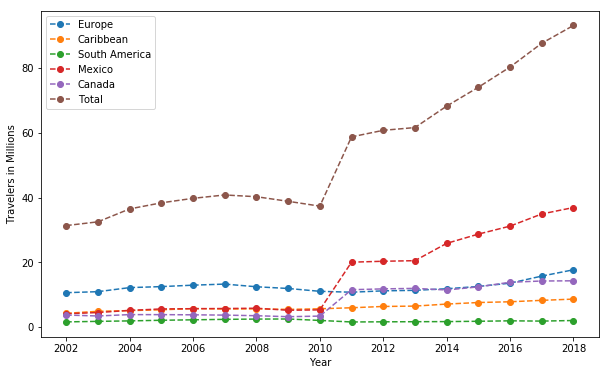

In [116]:
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(travel['year'], travel['europe'] / 1000000, 'o--', label='Europe')
ax1.plot(travel['year'], travel['caribbean'] / 1000000, 'o--', label='Caribbean')
ax1.plot(travel['year'], travel['southamer'] / 1000000, 'o--', label='South America')
ax1.plot(travel['year'], travel['mexico'] / 1000000, 'o--', label='Mexico')
ax1.plot(travel['year'], travel['canada'] / 1000000, 'o--', label='Canada')
ax1.plot(travel['year'], travel['total'] / 1000000, 'o--', label='Total')
ax1.set_xlabel('Year')
ax1.set_ylabel('Travelers in Millions')
ax1.legend()
plt.show(fig1)

## What do you notice in this graph

A huge spike between 2010 and 2012

![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview6.jpg)

However, if we just take a snapshot of time and look at 2018 and compare Mexico's travel versus deaths we start to see something interest

![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview7.jpg)

In [118]:
# proportion of US travellers to mexico 
prop_mexico_travel = travel['mexico'] / travel['total']
# proportion of US travellers to mexico by air
prop_mexico_air_travel = travel['mexico-air'] / travel['total']

print('Proportion of US Travelers to Mexico from 2002 to 2018:') 
print(round(prop_mexico_travel * 100))

Proportion of US Travelers to Mexico from 2002 to 2018:
0     13.0
1     14.0
2     14.0
3     15.0
4     14.0
5     14.0
6     15.0
7     14.0
8     14.0
9     34.0
10    34.0
11    33.0
12    38.0
13    39.0
14    39.0
15    40.0
16    40.0
dtype: float64


## Separate the deaths in Mexico by year

In [126]:
year = []
ndeaths = []
nhomicides = []
for y in range(2002, 2019, 1):
    start_date = str(y) + '-01-01'
    end_date = str(y) + '-12-31'
    df_mexico_year = df_mexico.loc[(df_mexico['Date'] >= start_date) & (df_mexico['Date'] <= end_date)]
    nd = len(df_mexico_year.index)
    nhom = (df_mexico_year['Cause of Death'].values == 'Homicide').sum()
    year.append(y)
    ndeaths.append(nd)
    nhomicides.append(nhom)
data = {'year':year, 'deaths':ndeaths, 'homicides':nhomicides}
mexico_deaths = pd.DataFrame(data)
mexico_deaths.head()

,year,deaths,homicides
0,2002,77,9
1,2003,199,40
2,2004,202,37
3,2005,236,50
4,2006,195,43


## Separate all deaths abroad by year

In [127]:
year = []
ndeaths = []
nhomicides = []
for y in range(2002, 2019, 1):
    start_date = str(y) + '-01-01'
    end_date = str(y) + '-12-31'
    df_all_year = df_all.loc[(df_all['Date'] >= start_date) & (df_all['Date'] <= end_date)]
    nd = len(df_all_year.index)
    nhom = (df_all_year['Cause of Death'].values == 'Homicide').sum()
    year.append(y)
    ndeaths.append(nd)
    nhomicides.append(nhom)
data = {'year':year, 'deaths':ndeaths, 'homicides':nhomicides}
all_deaths = pd.DataFrame(data)
all_deaths.head()

,year,deaths,homicides
0,2002,228,35
1,2003,756,120
2,2004,865,128
3,2005,838,142
4,2006,653,104


### Proportion of US travelers deaths in Mexico from 2002 to 2018

In [121]:
prop_deaths_mexico = mexico_deaths['deaths'] / all_deaths['deaths']
print('Proportion of US Travelers deaths in Mexico from 2002 to 2018:')
print(round(prop_deaths_mexico * 100))

Proportion of US Travelers deaths in Mexico from 2002 to 2018:
0     34.0
1     26.0
2     23.0
3     28.0
4     30.0
5     31.0
6     30.0
7     26.0
8     26.0
9     29.0
10    28.0
11    25.0
12    30.0
13    27.0
14    31.0
15    30.0
16    27.0
Name: deaths, dtype: float64


## Plot of deaths vs travellers

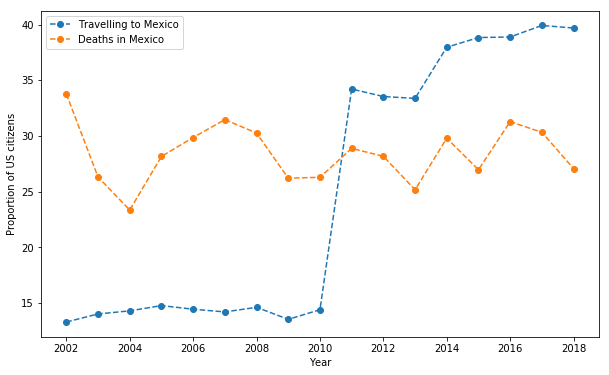

In [122]:
fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.plot(travel['year'], prop_mexico_travel * 100, 'o--', label='Travelling to Mexico')
ax2.plot(travel['year'], prop_deaths_mexico * 100, 'o--', label='Deaths in Mexico')
ax2.set_xlabel('Year')
ax2.set_ylabel('Proportion of US citizens')
ax2.legend()
plt.show(fig2)

### We need to remove 2002 to 2010 because the collection was different

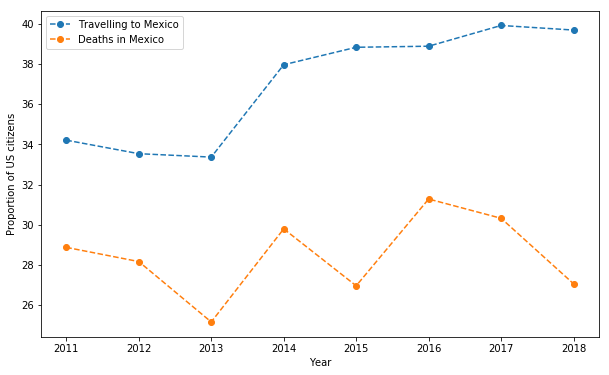

In [124]:
fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.plot(travel['year'][9:17], prop_mexico_travel[9:17] * 100, 'o--', label='Travelling to Mexico')
ax2.plot(travel['year'][9:17], prop_deaths_mexico[9:17] * 100, 'o--', label='Deaths in Mexico')
ax2.set_xlabel('Year')
ax2.set_ylabel('Proportion of US citizens')
ax2.legend()
plt.show(fig2)

### We also discussed the idea of homicides versus all deaths so we can plot the proportion of homicides as well

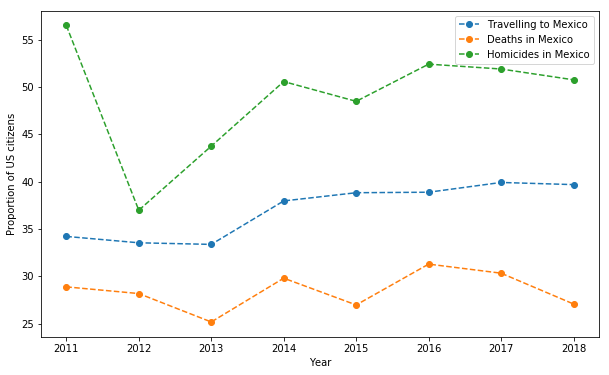

In [128]:
prop_homicides_mexico = mexico_deaths['homicides'] / all_deaths['homicides']
fig3, ax3 = plt.subplots(figsize=(10,6))
ax3.plot(travel['year'][9:17], prop_mexico_travel[9:17] * 100, 'o--', label='Travelling to Mexico')
ax3.plot(travel['year'][9:17], prop_deaths_mexico[9:17] * 100, 'o--', label='Deaths in Mexico')
ax3.plot(travel['year'][9:17], prop_homicides_mexico[9:17] * 100, 'o--', label='Homicides in Mexico')
ax3.set_xlabel('Year')
ax3.set_ylabel('Proportion of US citizens')
ax3.legend()
plt.show(fig3)

## What data issues do we still have – are these fair comparisons?

- Need to look at countries close to US i.e. canada 
- drug cartels etc in mexico so maybe only fair to actaully look at tourist locations 
- maybe only look at by air

### Read in and plot the proportion of deaths in Canada versus the proportion of travel to Canada

In [22]:
if not os.path.exists('Data/deaths_canada_2002_2019.csv'):
    !wget 'https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Data/deaths_canada_2002_2019.csv'
    df_canada = pd.read_csv('deaths_canada_2002_2019.csv', encoding='latin-1')
else:
    df_canada = pd.read_csv('Data/deaths_canada_2002_2019.csv', encoding='latin-1')
df_canada['Date'] = pd.to_datetime(df_canada['Date'])
year = []
ndeaths = []
nhomicides = []
for y in range(2002, 2019, 1):
    start_date = str(y) + '-01-01'
    end_date = str(y) + '-12-31'
    df_canada_year = df_canada.loc[(df_canada['Date'] >= start_date) & (df_canada['Date'] <= end_date)]
    nd = len(df_canada_year.index)
    nhom = (df_canada_year['Cause of Death'].values == 'Homicide').sum()
    year.append(y)
    ndeaths.append(nd)
    nhomicides.append(nhom)
data = {'year':year, 'deaths':ndeaths, 'homicides':nhomicides}
canada_deaths = pd.DataFrame(data)
canada_deaths.head()

,year,deaths,homicides
0,2002,5,0
1,2003,23,0
2,2004,20,3
3,2005,19,0
4,2006,7,1


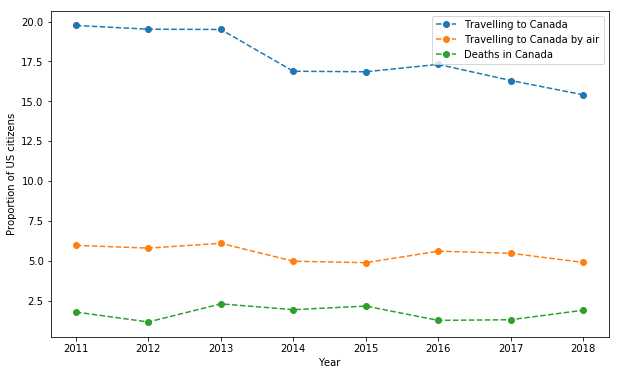

In [146]:
prop_canada_air_travel = travel['canada-air'] / travel['total']
prop_canada_travel = travel['canada'] / travel['total']
prop_death_canada = canada_deaths['deaths'] / all_deaths['deaths']
fig4, ax4 = plt.subplots(figsize=(10,6))
ax4.plot(travel['year'][9:17], prop_canada_travel[9:17] * 100, 'o--', label='Travelling to Canada')
ax4.plot(travel['year'][9:17], prop_canada_air_travel[9:17] * 100, 'o--', label='Travelling to Canada by air')
ax4.plot(travel['year'][9:17], prop_death_canada[9:17] * 100, 'o--', label='Deaths in Canada')
ax4.set_xlabel('Year')
ax4.set_ylabel('Proportion of US citizens')
ax4.legend()
plt.show(fig4)

This only gives us Canada's proportions, but what if we plot both mexico and canada on the same graph? What if we do two things to try to control for all of our data issues?
1. only look at travel by air to both countries
2. only look at deaths in Mexico in the top 10 tourist destination cities

### Plot Canada deaths and travel by air versus Mexico deaths (in top tourist locations) and travel by air

In [188]:
year = []
ndeaths = []
for y in range(2002, 2019, 1):
    start_date = str(y) + '-01-01'
    end_date = str(y) + '-12-31'
    df_mexico_tourist = df_mexico.loc[(df_mexico['Date'] >= start_date) & (df_mexico['Date'] <= end_date)]
    nd_tour = (len(df_mexico_tourist[df_mexico_tourist['City'].str.contains('Cancun')]) +
               len(df_mexico_tourist[df_mexico_tourist['City'].str.contains('Cabo San Lucas')]))
    year.append(y)
    ndeaths.append(nd_tour)
data = {'year':year, 'deaths':ndeaths}
mexico_tourist_deaths = pd.DataFrame(data)
prop_tour_deaths_mexico = mexico_tourist_deaths['deaths'] / all_deaths['deaths']

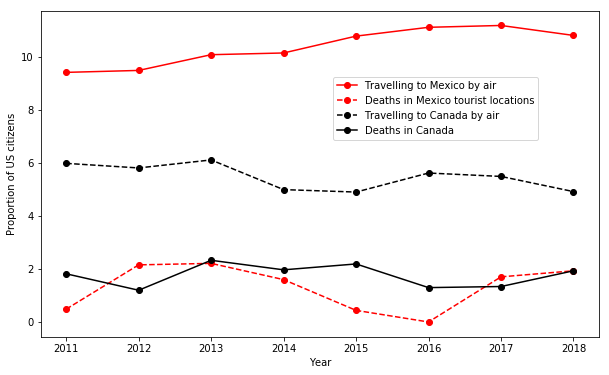

In [194]:
fig5, ax5 = plt.subplots(figsize=(10,6))
ax5.plot(travel['year'][9:17], prop_mexico_air_travel[9:17] * 100, 'or-', label='Travelling to Mexico by air')
ax5.plot(travel['year'][9:17], prop_tour_deaths_mexico[9:17] * 100, 'or--', label='Deaths in Mexico tourist locations')
ax5.plot(travel['year'][9:17], prop_canada_air_travel[9:17] * 100, 'ok--', label='Travelling to Canada by air')
ax5.plot(travel['year'][9:17], prop_death_canada[9:17] * 100, 'ok-', label='Deaths in Canada')
ax5.set_xlabel('Year')
ax5.set_ylabel('Proportion of US citizens')
ax5.legend(loc='right', bbox_to_anchor=(0.9,0.7))
plt.show(fig5)

## What is this telling us?

top tourist spots in mexico are safer than going to canada

### How do we understand our Spring Break risk even using the very conservative numbers:

In 2018:

*   196 Total deaths in Mexico 
*   67 Total homicides in Mexico 
*   36,923,011 US travelers to Mexico

That means there were


*   .53 Deaths per 100,000 travelers
*   .18 Homicides per 100,000 travelers

What could we compare that to?

## Exercise:

Find something to compare that to.

[This](https://ourworldindata.org/does-the-news-reflect-what-we-die-from) is a good place to start

![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview8.jpg)

## Communication of this Data Science Information

Now that we have found the real truth behind the data using data science techniques, how do we properly communicate this information?

We pick a headline that asks the question we wanted to know and gives a teaser about what data science question we are choosing. 
![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview9.jpg)

1.  *The issue in a nutshell*
    - **a tragic death created headlines about Mexico being dangerous**
    
2.  *The question we need to answer*
    - **is Mexico dangerous and will your be at risk**

3. *What is the data?*
![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview10.jpg)

4. *What are issues with data?*
![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview11.jpg)

5. *What other data do we need?*
![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview12.jpg)

6. *Deeper dive into the data with a further question*
![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview13.jpg)

7. *Issues with the conclusion from the data*
![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview14.jpg)

8. *Why do we care? How is this important to the stakeholders?*
![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview15.jpg)

9. *Overall data science issue at play*
![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview16.jpg)

## Homework 1: Communicate the Data Science Case
![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview17.jpg)

The Transport for London (TFL) (authorizing authority for taxis, transportation etc.) has stripped Uber of its license to operate. 
 
Why, while there are a lot of theories about it, TFL said that it was because Uber was dangerous. And the public went along with it. Why? Because somehow they believe that Uber dangerous. 
 
Where did that idea come from?

![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview18.jpg)

The licensed taxi drivers association (LTDA) but up a very striking billboard in London:

“Last year there were 154 rapes and sexual assaults by minicab drivers in London. At least 32 of these were uber drivers. Don’t take a risk with a minicab, only use a black cab”
 
For some context, taxis are black cabs and minicabs (which include ubers)
Here is an image of a crying young woman who has obviously just been sexually assaulted by one of these minicab or uber drivers.  

If you notice the Met Police logo and the Transport for London logo are on this very clearly. 
 
Pretty powerful stuff there. 
 
Very powerful. 

### Except it wasn’t true. 

![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview19.jpg)

What the freedom of information request from the Met police actually said is that over the year there had been “154 allegations of rape or sexual assault had been made where the suspect was alleged to be a taxi driver. 32 of these stated they were by an uber driver.“

The black cabs, Licensed Taxi Driver’s Association, took themselves out of it. 

When eventually the London Taxi Driver’s Association were asked about it, they said sorry, it was a mistype. They were then told to take it down and they did. 

![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview20.jpg)

And just  replaced it with another one.
 
“Last year there were 32 allegations of sexual assault made against Uber drivers. Why up your risk with a minicab?”
 
Ok, that is the truth, fair enough. So is it true that you do up your risk with Uber?

![alt text](https://raw.githubusercontent.com/stat10/DS10-Case-Studies/master/Images/preview21.jpg)

## Let's look

*How many Assaults are Uber Drivers responsible for?*
Just over 20% of sexual assaults by taxis drivers are by an Uber driver - is that disproportionately high or low compared to the number of journeys? Because, if for example, uber does all the journeys, all the taxis rides, the black cabs and other minicab drivers are out of business, than Uber should be associated with 100% of the sexual assaults by taxis in London.
 
According to TFL, every week there are 2-3 million journeys in all kinds of taxis including Uber. 
 
Uber in London do more than a million of these. 
 
So Uber does more than 1/3 of all taxi journeys in London but they are only associated with 1/5 of the sexual assaults. 
 
So no reason to believe that Uber drivers are any more dangerous than any other kind of taxi driver, actually quite the opposite. 

*What about the other headlines “Rates of Sexual Assault by taxis at an all time high!”*
 
In 2015 136 reports of rape or sexual assault
But by definition, a 5 year high means that it was as high 5 years ago. 
In 2009 (3 yrs before uber began operating in london) the number of sexual assaults and rapes was the same 136 
 
Uber in no way contributed to an increase in sexual assaults by taxi drivers. 

## Homework Assignment:
Write an article about the Uber ban in London like the Mexico for Spring break article. Include the same questions/issues in the Mexico for Spring break article including data, data issues, and risk. 